##### About
This notebook is a simple example of how segmentation can be used to extract the cat from the background. 

Developed by [José Eduardo Hernández Rodríguez](https://github.com/eduherrodp)

### Imports libraries 
In this section we import the libraries that we will use in the notebook. The libraries are: 
* [OpenCV](https://opencv.org/): OpenCV is a library of programming functions mainly aimed at real-time computer vision.
* [Matplotlib](https://matplotlib.org/): Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
* [Numpy](https://numpy.org/): NumPy is the fundamental package for scientific computing with Python.
* [Scikit-image](https://scikit-image.org/): Scikit-image is a collection of algorithms for image processing.


In [67]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import cv2

### Load image and gettings its RGB channels 
In this section we load the image and get its dimensions. The image is loaded using the function 'io.imread' from the library 'skimage'.

In [68]:

img = io.imread('img/gato.jpg')

# Obtenemos las capas RGB de la imagen with split
r, g, b = cv2.split(img)

### Histograms of the RGB channels
The image is divided into its RGB channels using the function 'split' from the library 'cv2'. The image is displayed using the function 'imshow' from the library 'matplotlib'.

Histograms of the RGB channels are obtained using the function 'histogram' from the library 'skimage'. The histograms are displayed using the function 'plot' from the library 'matplotlib'.

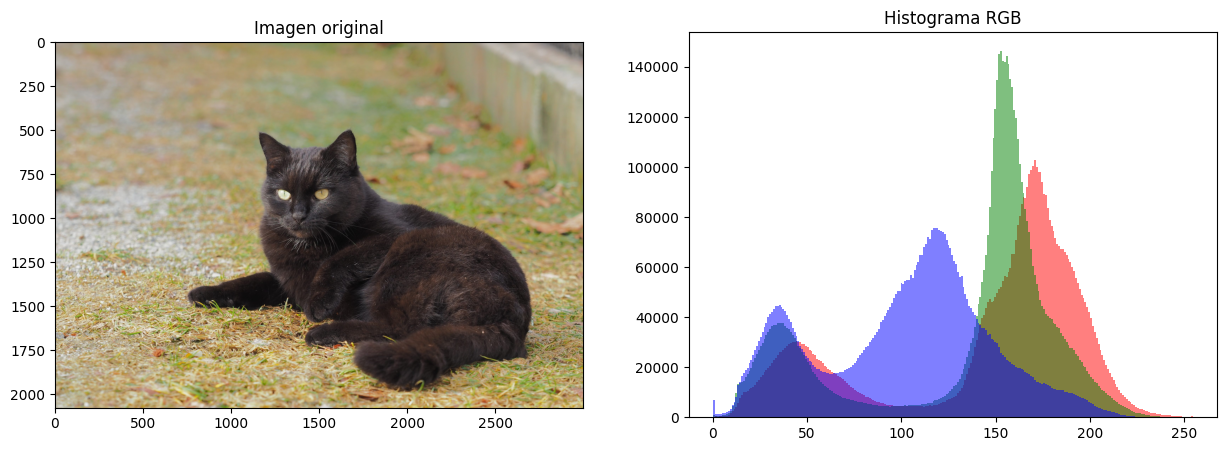

In [69]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Imagen original')
axs[1].hist(r.ravel(), bins=256, color='red', alpha=0.5)
axs[1].hist(g.ravel(), bins=256, color='green', alpha=0.5)
axs[1].hist(b.ravel(), bins=256, color='blue', alpha=0.5)
axs[1].set_title('Histograma RGB')
plt.show()


### Segmentation
First we get the values of the histogram of each channel. Then we get the maximum value of each histogram.

Explaining the code:
* ``np.histogram({r,g,b}.ravel(), 256, [0, 256])`` returns the histogram of the channel {r,g,b} and the bins of the histogram.
* ``np.argmax({r,g,b})`` returns the index of the maximum value of the histogram of the channel {r,g,b}.  

In [70]:
# Realizamos la binarización de la imagen por capas
# Para ello, primero obtenemos el histograma de la imagen por capas
hist_r, bins_r = np.histogram(r.ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(g.ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(b.ravel(), 256, [0, 256])

# Obtenemos el umbral de la imagen por capas
umbral_r = np.argmax(hist_r)
umbral_g = np.argmax(hist_g)
umbral_b = np.argmax(hist_b)

print('Umbral máximo R: ', umbral_r)
print('Umbral máximo G: ', umbral_g)
print('Umbral máximo B: ', umbral_b)


Umbral máximo R:  171
Umbral máximo G:  153
Umbral máximo B:  118


### Dilate and erode 
Binary image is obtained using the umbrales of the histograms ``bin_r = {r, g, b} > umbral_{r, g, b}`` we subtract 80 and 70 to the values of the histograms r and g to get a better result. 
We realize a logical operation between the binary images of the channels r, g and b to get the final binary image.

The binary image is dilated and eroded using the function 'dilate' and 'erode' from the library 'cv2'. 
* With ``np.ones((25,25), np.uint8)`` we create a matrix of 25x25 pixels with the value 1. 
* Using ``cv2.dilate(bin_img.astype(np.uint8), kernel, iterations=1)`` we dilate the binary image using the matrix that we created before.
* Finally, using ``cv2.erode(dilation, kernel, iterations=2)`` we erode the dilated image.

In [71]:
# Binarizamos la imagen para después realizar una operación lógica AND con la imagen original
# para obtener la imagen binarizada
bin_r = r > umbral_r - 80
bin_g = g > umbral_g - 70
bin_b = b > umbral_b 

# Realizamos la operación lógica AND para obtener la imagen binarizada
bin_img = np.logical_and(bin_r, bin_g, bin_b)
# Esto es equivalente a bin_img = bin_r & bin_g & bin_b y bin_img = bin_r * bin_g * bin_b

# Aplicamos dilatación y erosión a la imagen binarizada para obtener un mejor resultado
kernel = np.ones((25,25), np.uint8)
dilation = cv2.dilate(bin_img.astype(np.uint8), kernel, iterations=1)
erosion = cv2.erode(dilation, kernel, iterations=2)

### Getting the final image
Finaly we get the final image doing a logical operation between the bin_img that we obtained before and the eroded and dilated image.
With that we get a image where the cat is black and the background is white, so we can use the function ``np.invert()`` to get the final image and display it.

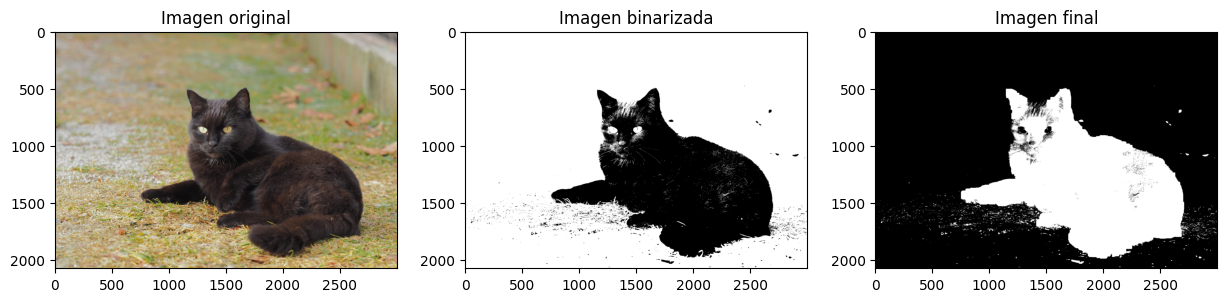

In [72]:

# Realizamos la operación lógica AND entre la imagen original y la imagen binarizada
final_img = np.logical_and(bin_img, erosion)
# Invertimos los valores de la imagen final para obtener el resultado deseado
final_img = np.invert(final_img)

# Mostramos la imagen original, la binarizada y la final
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Imagen original')
axs[1].imshow(bin_img, cmap='gray')
axs[1].set_title('Imagen binarizada')
axs[2].imshow(final_img, cmap='gray')
axs[2].set_title('Imagen final')
plt.show()

### References 
* [OpenCV](https://opencv.org/)
* [Matplotlib](https://matplotlib.org/)
* [Numpy](https://numpy.org/)
* [Scikit-image](https://scikit-image.org/)